# FIFA 23 Player Value Prediction and Analysis

Author: Oluwasola Fagbohun

Description:
This script aims to predict and analyze player values in FIFA 23 by leveraging machine learning techniques.
The dataset contains comprehensive attributes of players, including physical traits, skill ratings, club affiliations, and international standing.
The objective is to develop predictive models that estimate player values based on various contributing factors.

Steps:
1. Data Loading: Load the FIFA 23 player dataset.
2. Data Preprocessing: Handle missing values, encode categorical data, and normalize numerical attributes.
3. Visualization: Visualize trends, correlations, and patterns within the player ecosystem.
4. Model Training: Employ machine learning algorithms (e.g., Linear Regression, Random Forest Regression) to build predictive models.
5. Model Evaluation: Assess model performance using evaluation metrics like Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared.
6. Insights Generation: Derive insights into influential player attributes and their impact on market values.



## Data Loading

In [170]:
#Importing Libraries or Packages

#Data Manipulation
import pandas as pd
import numpy as np
import datetime as dt
import math

#Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

#Prediction and Regression Analysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error, mean_absolute_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer

import warnings
warnings.filterwarnings("ignore")
# Your code generating warnings here

In [171]:
#Read the CSV file
#Set low_memory=False to prevent mixed type warning 
data = pd.read_csv('player_data_full.csv', low_memory=False)

In [172]:
# To show all the columns in the data
pd.set_option('display.max_columns', None)

# Exploratory Data Analysis

The Exploratory Data Analysis (EDA) process in this FIFA 23 player value prediction project involves thorough examination and understanding of a comprehensive dataset. This dataset encompasses a wide range of player attributes, covering physical characteristics, skill ratings, club affiliations, and international standings. The primary goal is to utilize machine learning techniques to build predictive models that estimate player values. Through EDA, we'll explore relationships, patterns, and distributions within the data, aiming to identify key factors contributing to player values. This analysis lays the groundwork for informed feature selection, preprocessing, and model development to achieve accurate predictions of player values in the FIFA 23 dataset.

In [117]:
# Display the first few rows of the DataFrame
data.head()

Known As           Full Name  Overall  Potential  Value(in Euro)  \
0        L. Messi        Lionel Messi       91         91        54000000   
1      K. Benzema       Karim Benzema       91         91        64000000   
2  R. Lewandowski  Robert Lewandowski       91         91        84000000   
3    K. De Bruyne     Kevin De Bruyne       91         91       107500000   
4       K. Mbappé       Kylian Mbappé       91         95       190500000   

  Positions Played Best Position Nationality  \
0               RW           CAM   Argentina   
1            CF,ST            CF      France   
2               ST            ST      Poland   
3           CM,CAM            CM     Belgium   
4            ST,LW            ST      France   

                                         Image Link  Age  Height(in cm)  \
0  https://cdn.sofifa.net/players/158/023/23_60.png   35            169   
1  https://cdn.sofifa.net/players/165/153/23_60.png   34            185   
2  https://cdn.sofifa.net/players/188/545/23_60.png   33            185   
3  https://cdn.sofifa.net/players/192/985/23_60.png   31            181   
4  https://cdn.sofifa.net/players/231/747/23_60.png   23            182   

   Weight(in kg)  TotalStats  BaseStats            Club Name  Wage(in Euro)  \
0             67        2190        452  Paris Saint-Germain         195000   
1             81        2147        455       Real Madrid CF         450000   
2             81        2205        458         FC Barcelona         420000   
3             70        2303        483      Manchester City         350000   
4             73        2177        470  Paris Saint-Germain         230000   

   Release Clause Club Position Contract Until Club Jersey Number  Joined On  \
0        99900000            RW           2023                 30       2021   
1       131199999            CF           2023                  9       2009   
2       172200000            ST           2025                  9       2022   
3       198900000            CM           2025                 17       2015   
4       366700000            ST           2024                  7       2018   

  On Loan Preferred Foot  Weak Foot Rating  Skill Moves  \
0       -           Left                 4            4   
1       -          Right                 4            4   
2       -          Right                 4            4   
3       -          Right                 5            4   
4       -          Right                 4            5   

   International Reputation National Team Name  \
0                         5          Argentina   
1                         4             France   
2                         5             Poland   
3                         4            Belgium   
4                         4             France   

              National Team Image Link National Team Position  \
0  https://cdn.sofifa.net/flags/ar.png                     RW   
1  https://cdn.sofifa.net/flags/fr.png                     ST   
2  https://cdn.sofifa.net/flags/pl.png                     ST   
3  https://cdn.sofifa.net/flags/be.png                     RF   
4  https://cdn.sofifa.net/flags/fr.png                     ST   

  National Team Jersey Number Attacking Work Rate Defensive Work Rate  \
0                          10                 Low                 Low   
1                          19              Medium              Medium   
2                           9                High              Medium   
3                           7                High                High   
4                          10                High                 Low   

   Pace Total  Shooting Total  Passing Total  Dribbling Total  \
0          81              89             90               94   
1          80              88             83               87   
2          75              91             79               86   
3          74              88             93               87   
4          97              89          

In [118]:
# Assuming 'data' is your DataFrame, and you want to transpose the first few rows
data.head().T

0              1                   2  \
Known As            L. Messi     K. Benzema      R. Lewandowski   
Full Name       Lionel Messi  Karim Benzema  Robert Lewandowski   
Overall                   91             91                  91   
Potential                 91             91                  91   
Value(in Euro)      54000000       64000000            84000000   
...                      ...            ...                 ...   
RWB Rating                67             67                  67   
LB Rating                 62             63                  64   
CB Rating                 53             58                  63   
RB Rating                 62             63                  64   
GK Rating                 22             21                  22   

                              3              4  
Known As           K. De Bruyne      K. Mbappé  
Full Name       Kevin De Bruyne  Kylian Mbappé  
Overall                      91             91  
Potential                    91             95  
Value(in Euro)        107500000      190500000  
...                         ...            ...  
RWB Rating                   82             70  
LB Rating                    78             66  
CB Rating                    72             57  
RB Rating                    78             66  
GK Rating                    24             21  

[89 rows x 5 columns]

In [12]:
# Trim leading and trailing spaces from all column names
data.columns = data.columns.str.strip()

In [13]:
# Capture information about the DataFrame
info_list = [data.info()]

# Display the information list
print(info_list)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18539 entries, 0 to 18538
Data columns (total 89 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Known As                     18539 non-null  object
 1   Full Name                    18539 non-null  object
 2   Overall                      18539 non-null  int64 
 3   Potential                    18539 non-null  int64 
 4   Value(in Euro)               18539 non-null  int64 
 5   Positions Played             18539 non-null  object
 6   Best Position                18539 non-null  object
 7   Nationality                  18539 non-null  object
 8   Image Link                   18539 non-null  object
 9   Age                          18539 non-null  int64 
 10  Height(in cm)                18539 non-null  int64 
 11  Weight(in kg)                18539 non-null  int64 
 12  TotalStats                   18539 non-null  int64 
 13  BaseStats                    18

In [14]:
# Obtain column names
column_names = data.columns
column_names

Index(['Known As', 'Full Name', 'Overall', 'Potential', 'Value(in Euro)',
       'Positions Played', 'Best Position', 'Nationality', 'Image Link', 'Age',
       'Height(in cm)', 'Weight(in kg)', 'TotalStats', 'BaseStats',
       'Club Name', 'Wage(in Euro)', 'Release Clause', 'Club Position',
       'Contract Until', 'Club Jersey Number', 'Joined On', 'On Loan',
       'Preferred Foot', 'Weak Foot Rating', 'Skill Moves',
       'International Reputation', 'National Team Name',
       'National Team Image Link', 'National Team Position',
       'National Team Jersey Number', 'Attacking Work Rate',
       'Defensive Work Rate', 'Pace Total', 'Shooting Total', 'Passing Total',
       'Dribbling Total', 'Defending Total', 'Physicality Total', 'Crossing',
       'Finishing', 'Heading Accuracy', 'Short Passing', 'Volleys',
       'Dribbling', 'Curve', 'Freekick Accuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance',
       'Shot Powe

In [55]:
pr_cols = [
    'Age', 'Height(in cm)', 'Weight(in kg)', 'TotalStats', 'BaseStats', 'Wage(in Euro)', 'Release Clause',
    'Pace Total', 'Shooting Total', 'Passing Total', 'Dribbling Total', 'Defending Total', 'Physicality Total',
    'Crossing', 'Finishing', 'Heading Accuracy', 'Short Passing', 'Volleys', 'Dribbling', 'Curve',
    'Freekick Accuracy', 'LongPassing', 'BallControl', 'Acceleration', 'Sprint Speed', 'Agility', 'Reactions',
    'Balance', 'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots', 'Aggression', 'Interceptions',
    'Positioning', 'Vision', 'Penalties', 'Composure', 'Marking', 'Standing Tackle', 'Sliding Tackle',
    'Goalkeeper Diving', 'Goalkeeper Handling', 'GoalkeeperKicking', 'Goalkeeper Positioning',
    'Goalkeeper Reflexes', 'ST Rating', 'LW Rating', 'LF Rating', 'CF Rating', 'RF Rating', 'RW Rating',
    'CAM Rating', 'LM Rating', 'CM Rating', 'RM Rating', 'LWB Rating', 'CDM Rating', 'RWB Rating',
    'LB Rating', 'CB Rating', 'RB Rating', 'GK Rating'
]

print('BEST IN DIFFERENT ASPECTS :')
print('_________________________\n\n')

for col in pr_cols:
    best_player = data.loc[data[col].idxmax()]['Full Name']
    print(f'Best {col}: {best_player}')

BEST IN DIFFERENT ASPECTS :
_________________________


Best Age: Gianluigi Buffon
Best Height(in cm): Tomáš Holý
Best Weight(in kg): Lukas Watkowiak
Best TotalStats: Leon Goretzka
Best BaseStats: Ederson Santana de Moraes
Best Wage(in Euro): Karim Benzema
Best Release Clause: Kylian Mbappé
Best Pace Total: Kylian Mbappé
Best Shooting Total: C. Ronaldo dos Santos Aveiro
Best Passing Total: Kevin De Bruyne
Best Dribbling Total: Lionel Messi
Best Defending Total: Virgil van Dijk
Best Physicality Total: Manuel Neuer
Best Crossing: Kevin De Bruyne
Best Finishing: Robert Lewandowski
Best Heading Accuracy: Luuk de Jong
Best Short Passing: Kevin De Bruyne
Best Volleys: Lautaro Martínez
Best Dribbling: Lionel Messi
Best Curve: Lionel Messi
Best Freekick Accuracy: James Ward-Prowse
Best LongPassing: Kevin De Bruyne
Best BallControl: Neymar da Silva Santos Jr.
Best Acceleration: Kylian Mbappé
Best Sprint Speed: Kylian Mbappé
Best Agility: Bernardo Mota Carvalho e Silva
Best Reactions: C. Ronaldo

## Data Cleaning


In [21]:
# Check for Missing Values
# Identify if there are any missing values within the DataFrame
missing_values = data.isna()

In [16]:
# Check if the DataFrame contains any missing values
are_there_missing_values = missing_values.values.any()

In [25]:
# Rename Column
# Change the name of the 'Unnamed: 0' column to 'index' in the DataFrame 'df'
data.rename(columns={'Unnamed: 0': 'index'}, inplace=True)

In [29]:
missing_height = data[data['Height(in cm)'].isnull()].index.tolist()
missing_weight = data[data['Weight(in kg)'].isnull()].index.tolist()
if missing_height == missing_weight:
    print('They are same')
else:
    print('They are different')

They are same


## Data Visualization 

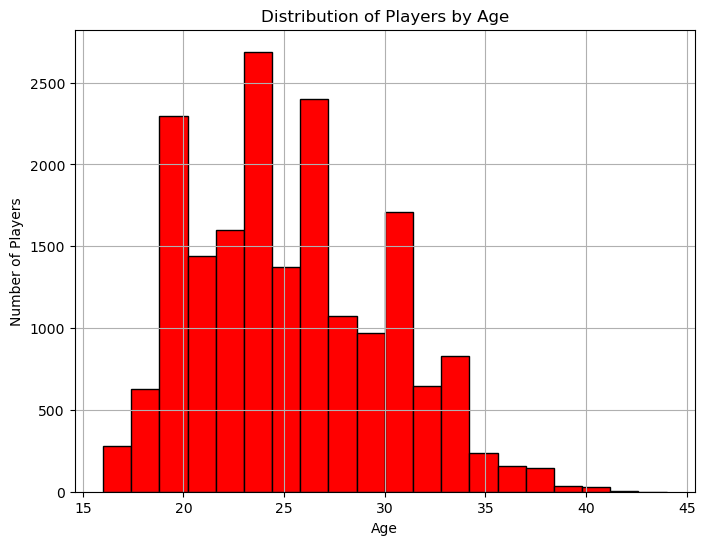

In [50]:
# You can plot the distribution using a histogram
plt.figure(figsize=(8, 6))
plt.hist(data['Age'], bins=20, color='red', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Number of Players')
plt.title('Distribution of Players by Age')
plt.grid(True)
plt.show()

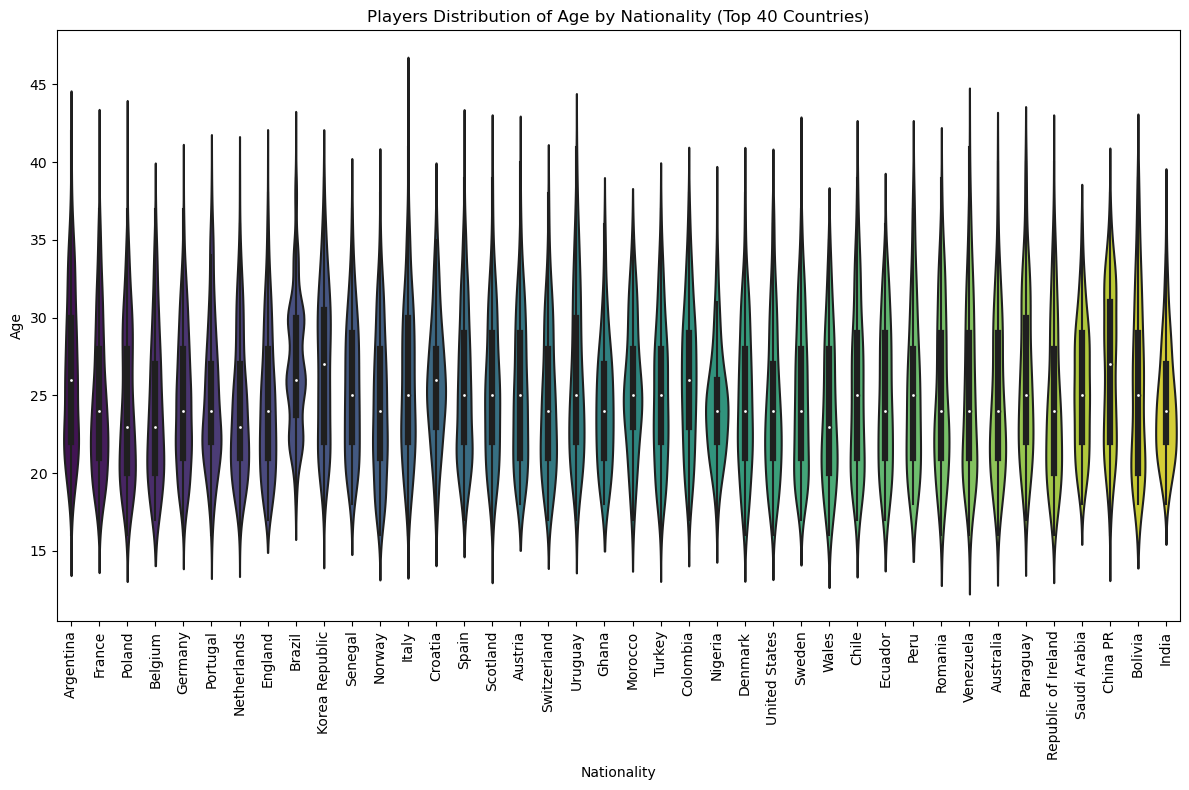

In [34]:
# Get the top 50 countries by the number of players
top_countries = data['Nationality'].value_counts().head(40).index.tolist()

# Filter the data for the top 50 countries
top_40_data = data[data['Nationality'].isin(top_countries)]

# Plotting the violin plot for the top 50 countries
plt.figure(figsize=(12, 8))
sns.violinplot(x='Nationality', y='Age', data=top_40_data, palette='viridis')
plt.xlabel('Nationality')
plt.ylabel('Age')
plt.title('Players Distribution of Age by Nationality (Top 40 Countries)')
plt.xticks(rotation=90)  # Rotating x-axis labels for better readability
plt.tight_layout()
plt.show()

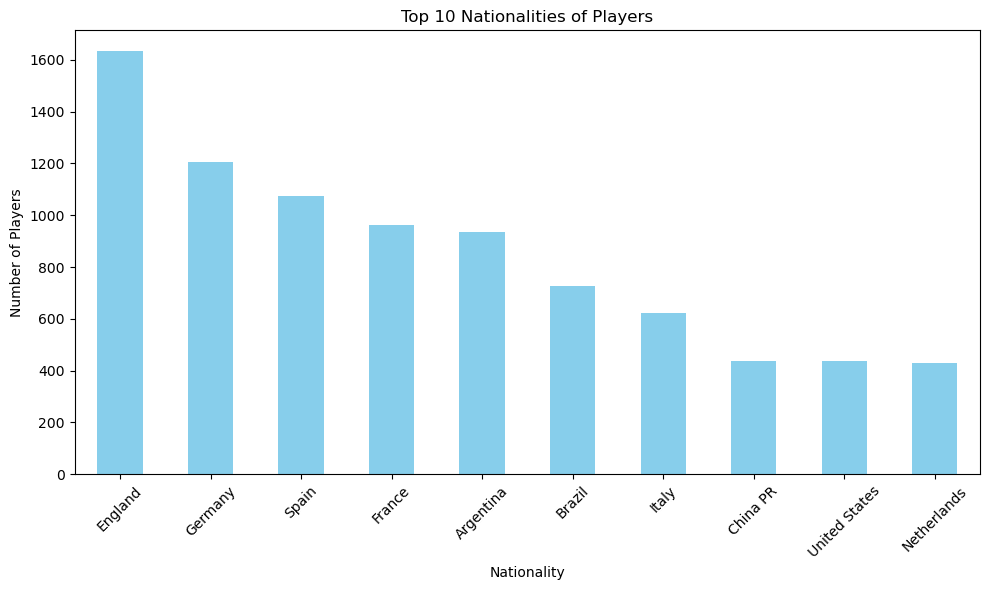

In [24]:
top_nationalities = data['Nationality'].value_counts().head(10)

# Plotting the top nationalities
plt.figure(figsize=(10, 6))
top_nationalities.plot(kind='bar', color='skyblue')
plt.xlabel('Nationality')
plt.ylabel('Number of Players')
plt.title('Top 10 Nationalities of Players')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Club Name
Manchester City        1.248655
Liverpool              1.098825
Paris Saint-Germain    1.051375
Real Madrid CF         1.035625
FC Barcelona           1.013125
FC Bayern München      0.962375
Chelsea                0.928525
Manchester United      0.775950
Atlético de Madrid     0.757600
Inter                  0.750550
Name: Value, dtype: float64


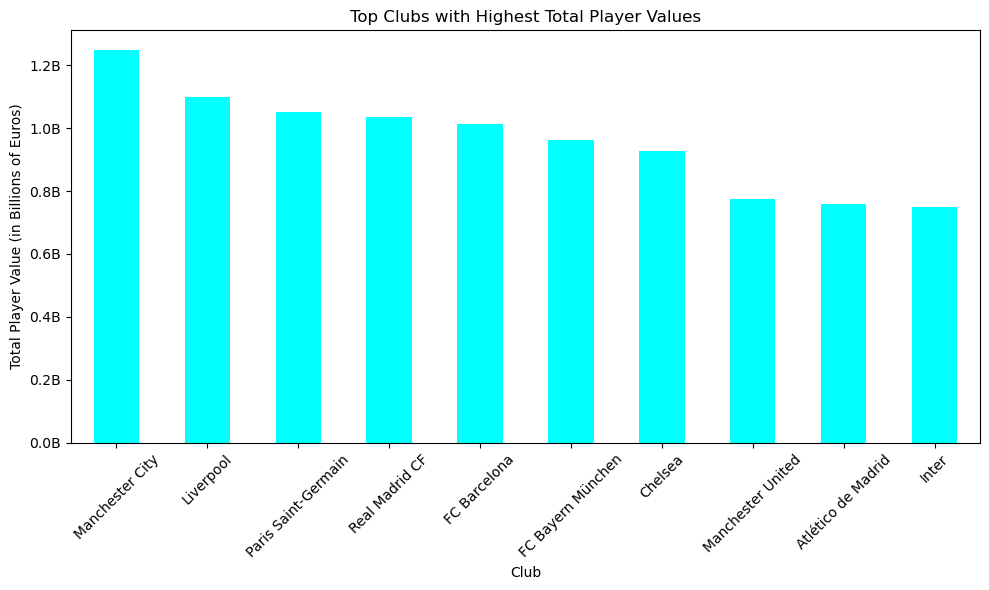

In [46]:
# Convert 'Value(in Euro)' column to numeric values in billions of euros
data['Value'] = data['Value(in Euro)'].replace({'€': '', 'K': 'e3', 'M': 'e6'}, regex=True).map(pd.eval).astype(float) / 1e9

# Group by clubs and calculate the total sum of player values for each club
club_values_total = data.groupby('Club Name')['Value'].sum().sort_values(ascending=False)

# Select the top N clubs with the highest total player values
top_N_clubs = club_values_total.head(10)  # Adjust '10' to show the top desired number of clubs

# Print the top clubs with the highest total player values
print(top_N_clubs)

## Plotting the top N clubs with the highest total player values in billions of euros
plt.figure(figsize=(10, 6))
top_N_clubs.plot(kind='bar', color='cyan')
plt.xlabel('Club')
plt.ylabel('Total Player Value (in Billions of Euros)')
plt.title('Top Clubs with Highest Total Player Values')
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.1f}B'))
plt.tight_layout()
plt.show()

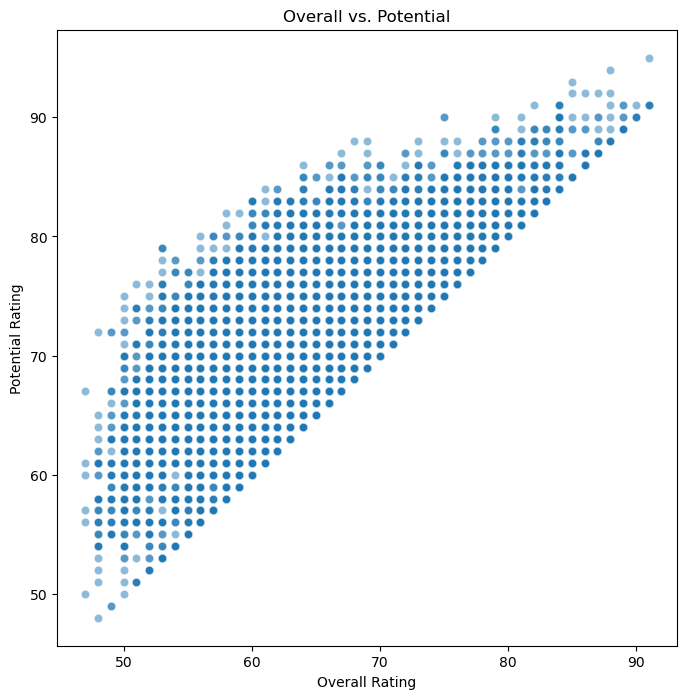

In [13]:
# Ensure the correct column names are used in the scatterplot
plt.figure(figsize=(8, 8))  # Set the figure size

# Create a scatter plot comparing Overall Rating and Potential Rating
sns.scatterplot(data=data, x='Overall', y='Potential', alpha=0.5)

# Set the title and labels for the axes
plt.title('Overall vs. Potential')
plt.xlabel('Overall Rating')
plt.ylabel('Potential Rating')

plt.show()  # Display the plot

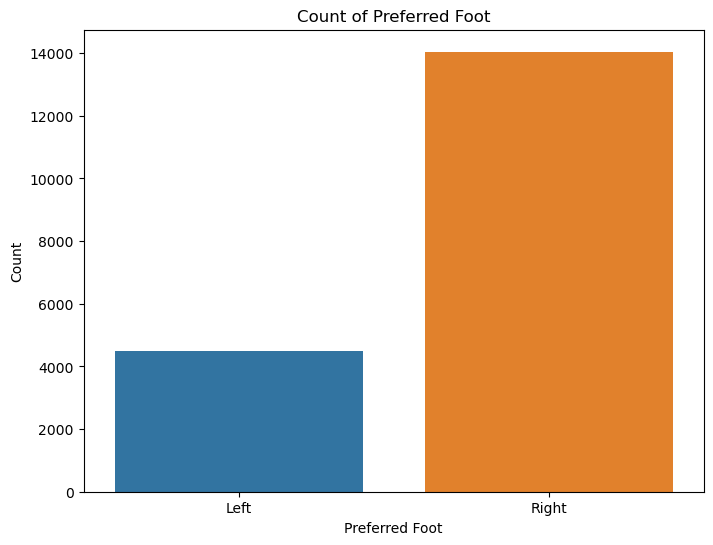

In [15]:
# Create a count plot for Preferred Foot
plt.figure(figsize=(8, 6))  # Set the figure size

# Plotting the count of Preferred Foot
sns.countplot(data=data, x='Preferred Foot')

# Set the title and labels for the axes
plt.title('Count of Preferred Foot')
plt.xlabel('Preferred Foot')
plt.ylabel('Count')

plt.show()  # Display the plot

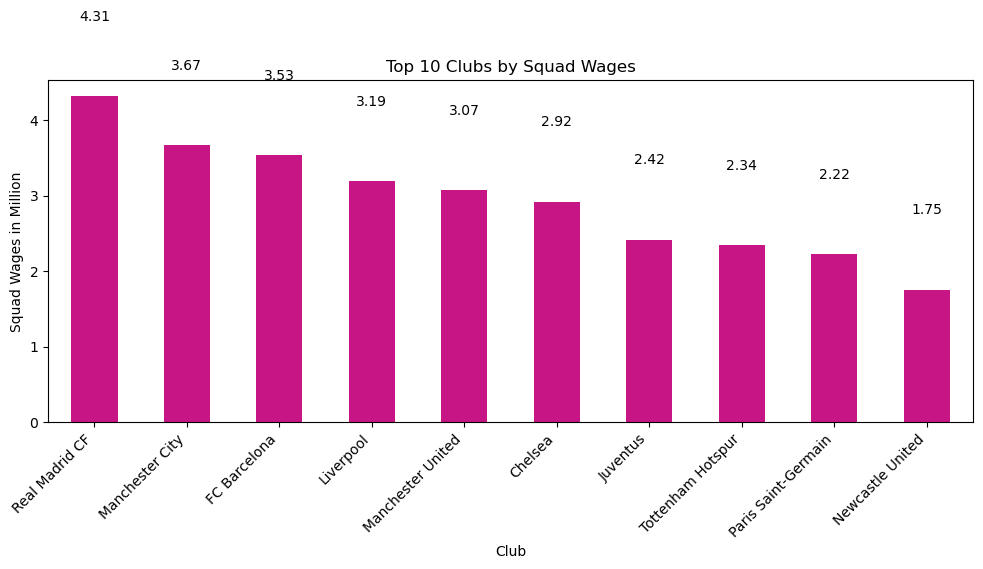

In [31]:
# Grouping the data by 'Club Name' and calculating total wages, then sorting and selecting the top 10 clubs
club_wage_bill = data.groupby('Club Name')['Wage(in Euro)'].sum() / 1_000_000  # Dividing by 1,000,000 to convert to million
top_10_clubs = club_wage_bill.sort_values(ascending=False).head(10)

# Creating a bar plot for the top 10 clubs with the highest wage bills
plt.figure(figsize=(10, 6))
top_10_clubs.plot(kind='bar', color='#C71585')  # Using a hexadecimal color code for 'violetred'

# Adding labels and titles
plt.xlabel('Club')
plt.ylabel('Squad Wages in Million')
plt.title('Top 10 Clubs by Squad Wages')
plt.xticks(rotation=45, ha='right')  # Rotate x-labels for better readability

# Adding text labels for each bar
for i, v in enumerate(top_10_clubs):
    plt.text(i, v + 1, str(round(v, 2)), ha='center')

plt.tight_layout()
plt.show()

### Correlation Analysis

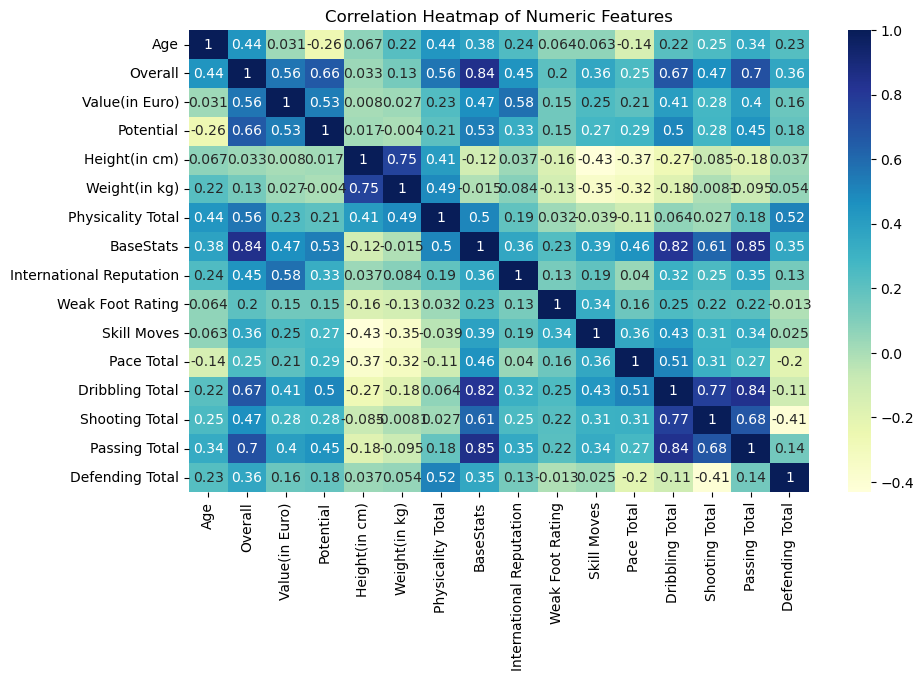

In [181]:
# List of numeric features for correlation analysis
numeric_features = [
    'Age', 'Overall', 'Value(in Euro)', 'Potential', 'Height(in cm)', 'Weight(in kg)',
    'Physicality Total', 'BaseStats', 'International Reputation', 'Weak Foot Rating',
    'Skill Moves', 'Pace Total', 'Dribbling Total', 'Shooting Total', 'Passing Total',
    'Defending Total'
]

# Creating a correlation matrix
corr_matrix = data[numeric_features].corr()

# Plotting the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu')
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

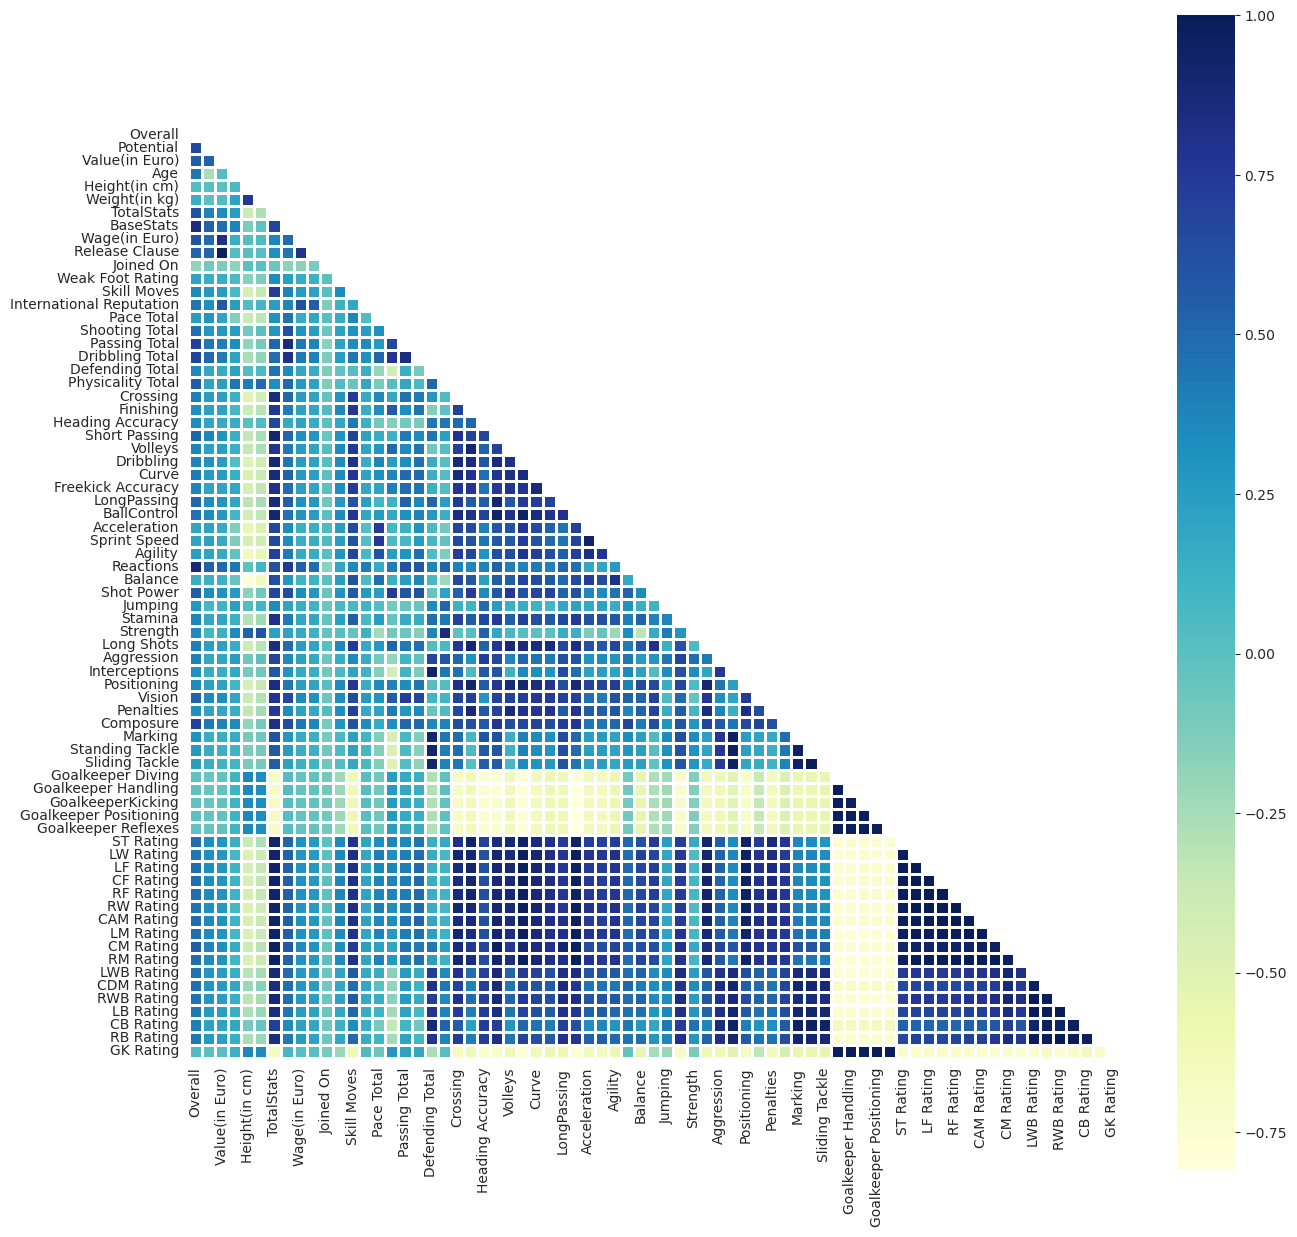

In [51]:
corr = data.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(15, 15))
    ax = sns.heatmap(corr,mask=mask,square=True,linewidths=.8,cmap="YlGnBu")

### World Best Players Categories and Visualization

In [102]:
# get top 10 ST players in the world.
ST_position = data[data["Best Position"]=="ST"].sort_values("Overall",ascending=False)[["Known As","Overall"]]
ST_position = ST_position.iloc[:6,:]

In [103]:
GK_position = data[data["Best Position"]=="GK"].sort_values("Overall",ascending=False)[["Known As","Overall"]]
GK_position = GK_position.iloc[:6,:]

In [104]:
LW_position = data[data["Best Position"]=="LW"].sort_values("Overall",ascending=False)[["Known As","Overall"]]
LW_position = LW_position.iloc[:6,:]

In [105]:
CM_position = data[data["Best Position"]=="CM"].sort_values("Overall",ascending=False)[["Known As","Overall"]]
CM_position = CM_position.iloc[:6,:]

In [108]:
# function plot bar chart for top 10 player in selected position.
def draw(data, color, position, ax):
    plt.style.use('tableau-colorblind10')
    sns.barplot(data["Known As"],data["Overall"],color=color , ax=ax).set_title("World Best Top 10 " + position +" players", fontsize=14)
    ax.set_xticklabels(ax.get_xticklabels(),rotation=30)

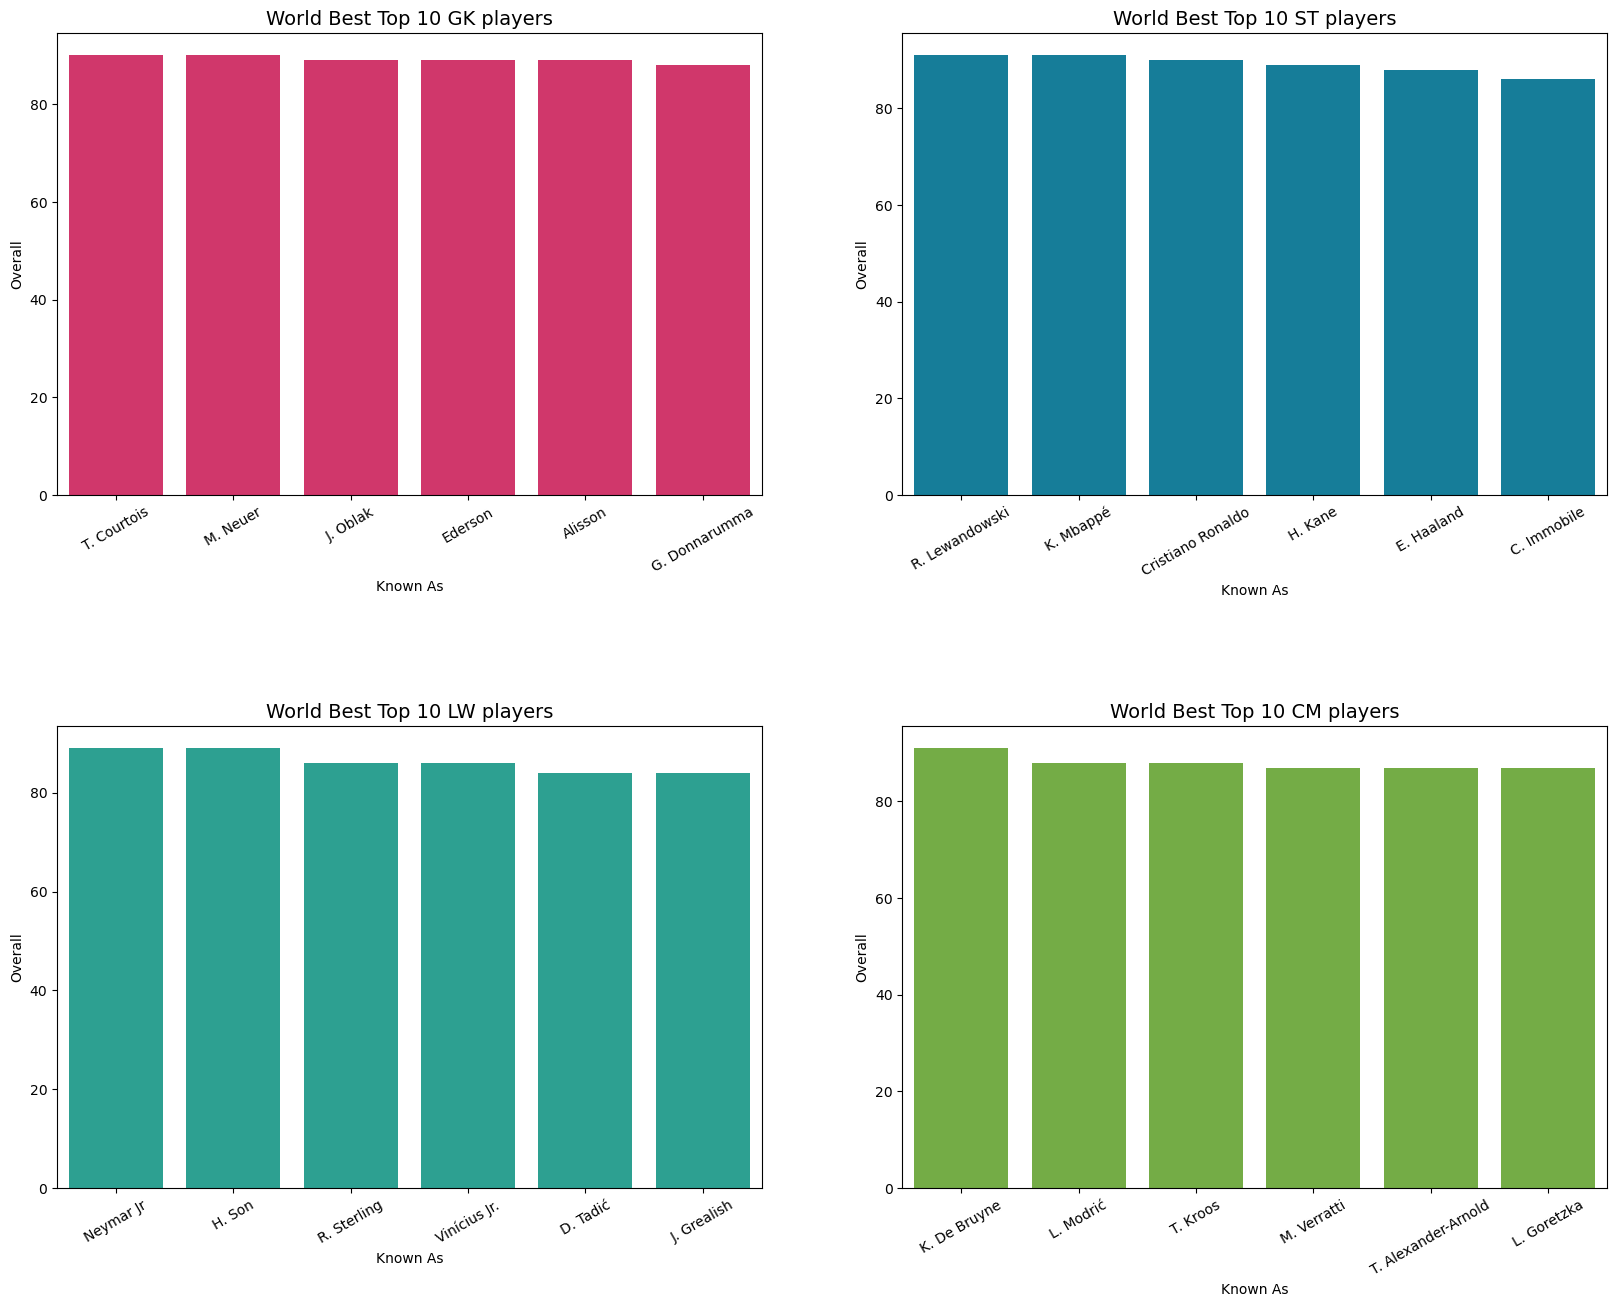

In [113]:
# plot 4 figures that display Top 10 player in ST, GK, LW, RF positions.
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=[20, 15])

draw(GK_position,"#e91e63", "GK",axes[0,0])
draw(ST_position,"#0089af", "ST",axes[0,1])
draw(LW_position,"#1ab39f", "LW",axes[1,0])
draw(CM_position,"#72bd35", "CM",axes[1,1])

# Adjust the space between subplots
plt.subplots_adjust(hspace=0.5)
plt.show()

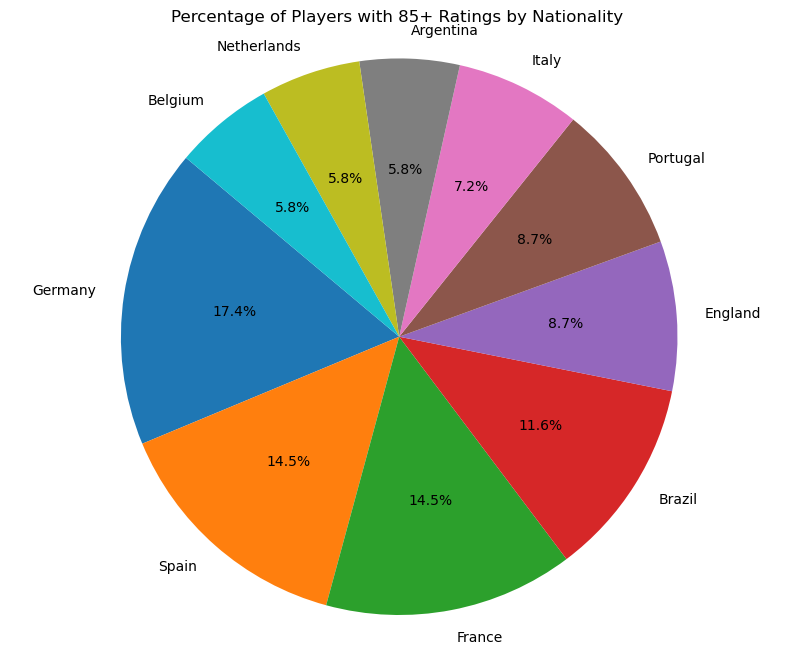

In [23]:
# Filter players with an overall rating of 85 or higher
high_rated_players = data[data['Overall'] >= 85]

# Calculate the percentage of players by nationality
player_counts = high_rated_players['Nationality'].value_counts(normalize=True) * 100

# Select top 10 nationalities for better visualization (optional)
top_nationalities = player_counts.head(10)

# Create a pie chart for the percentage of players by nationality
plt.figure(figsize=(10, 8))  # Set the figure size

# Plotting the pie chart
plt.pie(top_nationalities, labels=top_nationalities.index, autopct='%1.1f%%', startangle=140)

# Set the title
plt.title('Percentage of Players with 85+ Ratings by Nationality')

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

plt.show()  # Display the plot

In [123]:
import plotly.graph_objs as go

player_index = 0
col = ['Crossing', 'Finishing', 'Short Passing', 'Sprint Speed', 'Stamina', 'Strength', 'Vision', 'Acceleration', 'BallControl']
observation = data.loc[player_index, col].astype("int64")

# Use to concat skills with its value
categories = []
for i in col:
    categories.append(i + ": " + str(int(observation[i])) + "%")

# Plot Lionel MESSI skills radar
fig = go.Figure()
fig.add_trace(go.Scatterpolar(r=observation, theta=categories, fill='toself',
                              name=data.iloc[player_index]["Known As"], line_color="red"))
fig.update_layout(polar=dict(radialaxis=dict(visible=False, range=[0, 100])), showlegend=True)
fig.show()

In [127]:
player_index = 1  # Change this to the index of the midfielder you want to visualize
midfielder_attributes = ['Crossing', 'Finishing', 'Short Passing', 'Sprint Speed', 'Stamina', 'Strength', 'Vision', 'Acceleration', 'BallControl']  # Attributes for a midfielder

observation = data.loc[player_index, midfielder_attributes].astype("int64")

# Concatenate attribute names with their values
categories = []
for attr in midfielder_attributes:
    categories.append(attr + ": " + str(int(observation[attr])) + "%")

# Plot midfielder skills radar
fig = go.Figure()
fig.add_trace(go.Scatterpolar(r=observation, theta=categories, fill='toself',
                              name=data.iloc[player_index]["Known As"], line_color="blue"))
fig.update_layout(polar=dict(radialaxis=dict(visible=False, range=[0, 100])), showlegend=True)
fig.show()


# Modelling Training

In machine learning, model training refers to the process of fitting a model to a given dataset, allowing the model to learn the patterns and relationships within the data. Linear regression is a fundamental statistical method used for modeling the relationship between a dependent variable and one or more independent variables.

Linear Regression Model Training Include the following steps:

1. Data Preparation: Gather a dataset with features (input variables) and a target variable (player value).Split the data into training and testing sets for model evaluation.

2. Model Initialization: Linear regression assumes a linear relationship between input and target variables. Initialize model parameters, like coefficients and intercepts for the linear equation (y = mx + c).

3. Training the Model: Fit the model using training data to optimize coefficients that minimize predicted vs. actual value differences.Common optimization methods include Ordinary Least Squares (OLS) or gradient descent.

4. Evaluation: Make predictions on the test dataset using the trained model.Assess the model's performance using metrics like Mean Squared Error (MSE), R-squared, or Root Mean Squared Error (RMSE) to gauge its generalization ability.

In [163]:
data.dropna(subset=['Age', 'Height(in cm)', 'Nationality', 'Value(in Euro)'], inplace=True)

# Define your features and target variable
X = data[['Age', 'Height(in cm)', 'Nationality']].copy()  # features: age, height, nationality
y = data['Value(in Euro)'].copy()  # target variable: price

le = LabelEncoder()
X.loc[:, 'Nationality'] = le.fit_transform(X['Nationality'])

# Split the data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)


Mean Squared Error: 49339962224241.914


# Model Optimization

In [177]:
# Drop rows with missing values in either X or y
data.dropna(subset=['Age', 'Height(in cm)', 'Nationality', 'Value(in Euro)'], inplace=True)

In [ ]:
# Select relevant features based on correlation and domain knowledge
selected_features = ['Age', 'Height(in cm)', 'Nationality', 'Value(in Euro)']
X = data[selected_features].copy()
y = data['Value(in Euro)'].copy()

In [175]:
le = LabelEncoder()
X.loc[:, 'Nationality'] = le.fit_transform(X['Nationality'])

scaler = StandardScaler()
X[['Age', 'Height(in cm)']] = scaler.fit_transform(X[['Age', 'Height(in cm)']])

# Split the data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [176]:
# Define the model and hyperparameters for grid search
model = Ridge()
param_grid = {'alpha': [0.01, 0.1, 1, 10]}

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)

# Retrieve the best model
best_model = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred = best_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('Mean Absolute Error:', mae)

Mean Squared Error: 2.78545973628343e-18
Root Mean Squared Error: 1.6689696630806177e-09
Mean Absolute Error: 5.507632468005664e-10
